In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
fashion_train_df=pd.read_csv('fashion-mnist_train.csv')

In [3]:
fashion_test_df=pd.read_csv('fashion-mnist_test.csv')

In [4]:
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
fashion_test_df.shape

(10000, 785)

In [8]:
training = np.array(fashion_train_df,dtype='float32')

In [9]:
testing = np.array(fashion_test_df,dtype='float32')

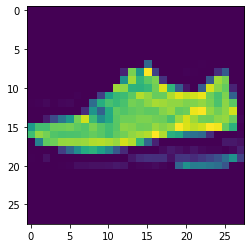

In [10]:
plt.imshow(training[729,1:].reshape(28, 28))

4.0

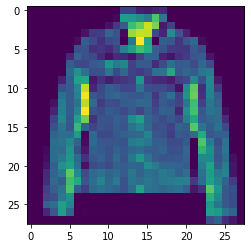

In [11]:
import random
i=random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28, 28))
label=training[i,0]
label

In [12]:
X_train=training[:,1:]/255
y_train=training[:,0]

In [13]:
X_test=testing[:,1:]/255
y_test=testing[:,0]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_validate,y_train,y_validate= train_test_split(X_train,y_train,test_size=0.2,random_state=12345)

In [16]:
X_train=X_train.reshape(X_train.shape[0], *(28,28,1)) 
X_test=X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [17]:
X_train.shape

(48000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_validate.shape

(12000, 28, 28, 1)

In [20]:
import keras

Using TensorFlow backend.


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()

In [23]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation ='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [24]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
cnn_model.add(Flatten())

In [26]:
cnn_model.add(Dense(output_dim=32,activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [27]:
cnn_model.add(Dense(output_dim=32,activation='sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=32)`
  """Entry point for launching an IPython kernel.


In [28]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [29]:
cnn_model.fit(X_train,
    y_train,
    batch_size=500,
    epochs=50,
    verbose=1,

    validation_data=(X_validate,y_validate)
 )


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 25s 511us/step - loss: 1.4264 - accuracy: 0.4752 - val_loss: 0.6367 - val_accuracy: 0.7678
Epoch 2/50
48000/48000 [==============================] - 22s 453us/step - loss: 0.5451 - accuracy: 0.8046 - val_loss: 0.4806 - val_accuracy: 0.8258
Epoch 3/50
48000/48000 [==============================] - 23s 469us/step - loss: 0.4503 - accuracy: 0.8417 - val_loss: 0.4285 - val_accuracy: 0.8515
Epoch 4/50
48000/48000 [==============================] - 22s 454us/step - loss: 0.4142 - accuracy: 0.8541 - val_loss: 0.3900 - val_accuracy: 0.8662
Epoch 5/50
48000/48000 [==============================] - 22s 460us/step - loss: 0.3858 - accuracy: 0.8664 - val_loss: 0.3768 - val_accuracy: 0.8702
Epoch 6/50
48000/48000 [==============================] - 22s 458us/step - loss: 0.3677 - accuracy: 0.8717 - val_loss: 0.3698 - val_accuracy: 0.8672
Epoch 7/50
48000/48000 [==============================] 

In [30]:
eval=cnn_model.evaluate(X_test,y_test)
print('Test Accuracy:{:.3f}'.format(eval[1]))


10000/10000 [==============================] - 1s 105us/step
Test Accuracy:0.911


In [31]:
pred_class=cnn_model.predict_classes(X_test)

In [32]:
pred_class

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [33]:
L=5
W=5
fig, axes=plt.subplot(L, W, figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,L*W):
        axes[i].imshow(X_test[i].reshape(28,28))
        axes[i].set_title("Prediction Class={:0.1f}\n True class= {:0.1f}".format(pred_class[i],y_test[i]))
        axes[i].axis('off')
    
    
plt.subplots_adjust(wspace=0.5) 

ValueError: Illegal argument(s) to subplot: (5, 5)

<Figure size 432x288 with 0 Axes>

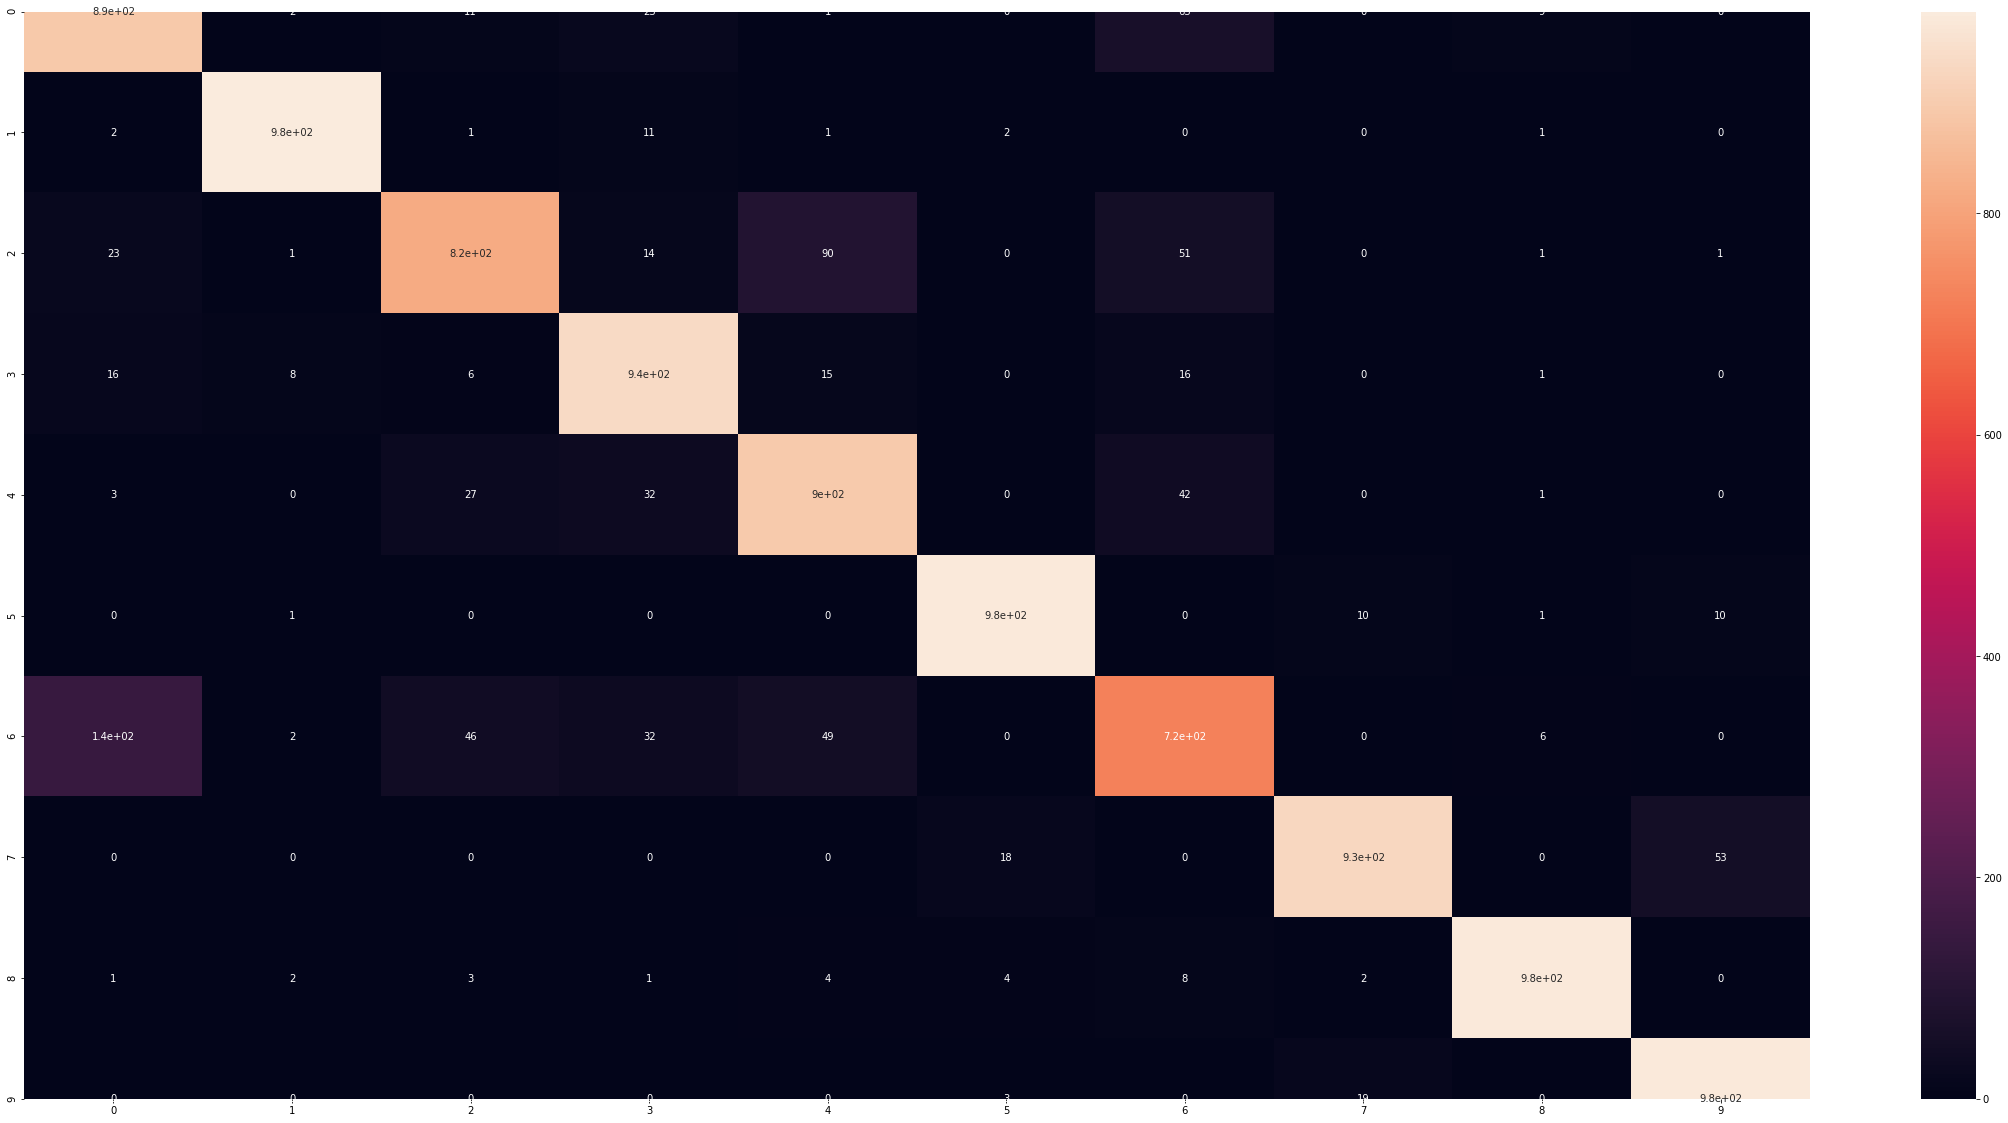

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_class)
plt.figure(figsize=(40,20))
sb.heatmap(cm,annot=True)

In [35]:
from sklearn.metrics import classification_report
num_class=10
target_names=["Class()".format(i) for i in range(num_class)]
print(classification_report(y_test,pred_class,target_names=target_names))


              precision    recall  f1-score   support

     Class()       0.83      0.89      0.86      1000
     Class()       0.98      0.98      0.98      1000
     Class()       0.90      0.82      0.86      1000
     Class()       0.89      0.94      0.91      1000
     Class()       0.85      0.90      0.87      1000
     Class()       0.97      0.98      0.98      1000
     Class()       0.80      0.72      0.76      1000
     Class()       0.97      0.93      0.95      1000
     Class()       0.98      0.97      0.98      1000
     Class()       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

